In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

output_directory = '/home/marco/DataspellProjects/thesis/output/pca/ST002498/'

df = pd.read_csv('../../../data/ST002498_z.csv')

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

Filling missing values with the mean

In [10]:
df.fillna(df.mean(), inplace=True)

Performing PCA to reduce the number of features and visualizing the data

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Separate features and labels
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Standardize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Perform PCA
num_components = 10  # You can adjust this number based on your needs
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

Explained variance by different principal components
Scree plot

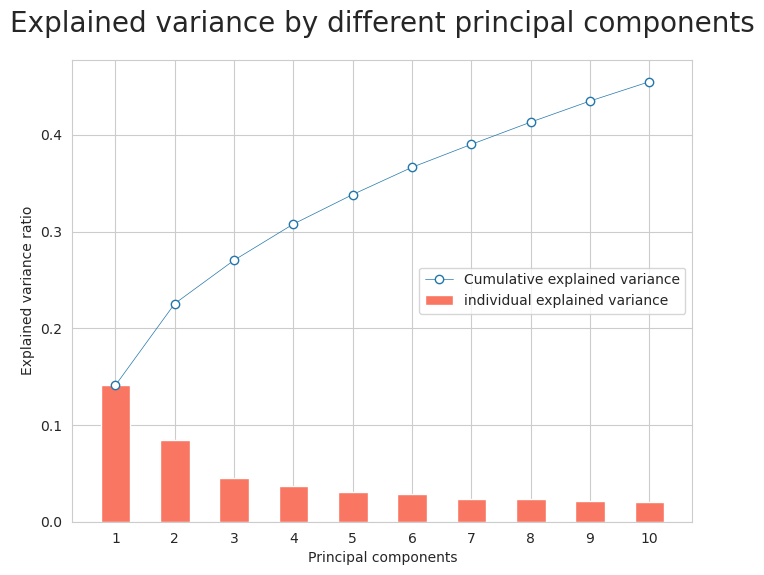

In [20]:
plt.figure(figsize=(8, 6))
plt.xticks(range(1, num_components + 1))  # Start x-axis ticks from 1
cum_var = pca.explained_variance_ratio_.cumsum()
scree_var = pca.explained_variance_ratio_
plt.plot(range(1, num_components + 1), cum_var,
         marker='o', linestyle='-', label='Cumulative explained variance',
         linewidth=0.5, mfc='w', color=palette[0])
plt.bar(range(1, num_components + 1), scree_var,
        label='individual explained variance', width=0.5, color=palette[1])
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance by different principal components', fontsize=20, pad=20)

plt.legend( loc='center right')
plt.savefig(fname=output_directory + 'scree_plot.png', dpi=300)

Create a DataFrame with the PCA results

In [13]:
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, num_components + 1)])
pca_df['Diagnosis'] = y

Visualize the data

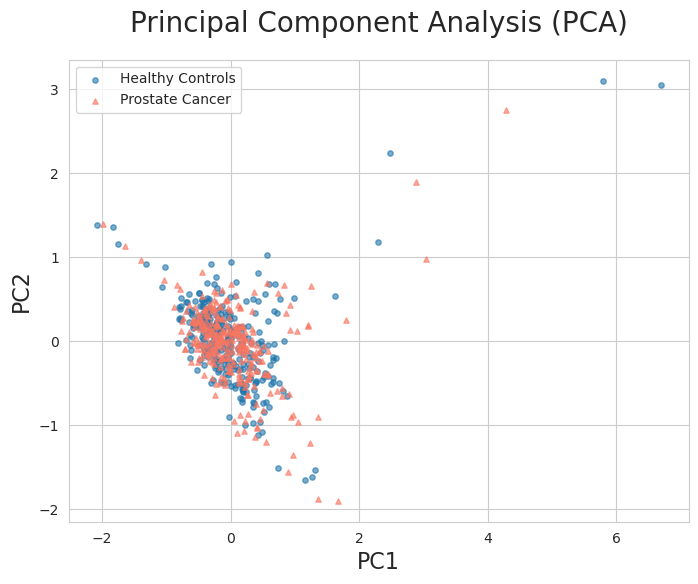

In [22]:
plt.figure(figsize=(8, 6))
labels = ['Healthy Controls', 'Prostate Cancer']
for i, label in enumerate(labels):
    plt.scatter(pca_df.loc[pca_df['Diagnosis'] == i, 'PC1'],
                pca_df.loc[pca_df['Diagnosis'] == i, 'PC2'],
                label=label, alpha=0.6, s=15, marker={0: 'o', 1: '^'}[i])

plt.xlabel('PC1', fontsize=16)
plt.ylabel('PC2', fontsize=16)

plt.title('Principal Component Analysis (PCA)', fontsize=20, pad=20)
plt.legend()
plt.savefig(fname=output_directory + '2d_plot.png', dpi=300)

3D plot of first 3 principal components

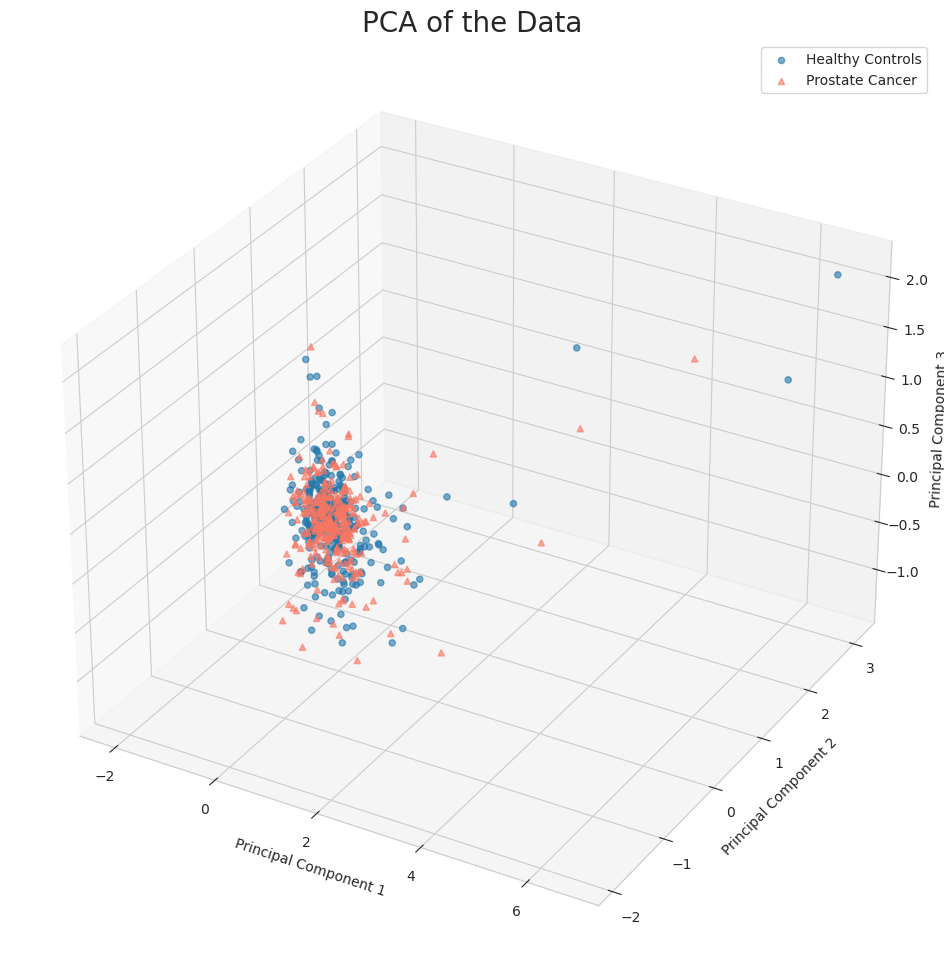

In [15]:

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

labels = ['Healthy Controls', 'Prostate Cancer']
for i, label in enumerate(labels):
    ax.scatter(pca_df.loc[pca_df['Diagnosis'] == i, 'PC1'],
               pca_df.loc[pca_df['Diagnosis'] == i, 'PC2'],
               pca_df.loc[pca_df['Diagnosis'] == i, 'PC3'],
               label=label, alpha=0.6, s=20, marker={0: 'o', 1: '^'}[i])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('PCA of the Data', fontsize=20)
plt.legend()
plt.savefig(fname=output_directory + '3d_plot.png', dpi=192)

In [16]:
# export 3d plot animation

for angle in range(70, 210, 2):

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    labels = ['Healthy Controls', 'ProCan']  # Adjust labels based on your class labels
    for i, label in enumerate(labels):
        ax.scatter(pca_df.loc[pca_df['Diagnosis'] == i, 'PC1'],
                   pca_df.loc[pca_df['Diagnosis'] == i, 'PC2'],
                   pca_df.loc[pca_df['Diagnosis'] == i, 'PC3'],
                   label=label, alpha=0.8, s=50, marker={0: '^', 1: 'o'}[i])

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

    plt.title('PCA of the Data')
    plt.legend()

    # Set the angle of the camera
    ax.view_init(30, angle)

    # Save it
    filename = '/home/marco/DataspellProjects/thesis/output/pca/3d_plot' + str(angle) + '.png'
    #plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)